# Numerical integration example

Volume integration in 3-D

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Shape definition

In [2]:
# Return 1 for point inside sphere, 0 otherwise

def isInside(x,y,z) :
    "Sphere with unit radius and origing at (0,0,0)"
    r2 = x*x + y*y + z*z
    return int( r2 < 1 )

### (2) Run numerical integration of volume

In [3]:
# Number of divisions along each axis taken as argument

def intVol(Ndiv):

    # Integration range (common for all coordinates)

    Xmin = -1.
    Xmax = 1.

    dX = (Xmax-Xmin)/Ndiv
    dV = dX**3

    # Test points in one coordinate

    Xrange = np.arange(Xmin+dX/2.,Xmax,dX)

    # Main loop

    V = 0

    for x in Xrange:
        for y in Xrange:
            for z in Xrange:
                V+=dV*isInside(x,y,z)
    
    return V

### (3) Integration with increasing precision

In [4]:
# Test values for number of divisions

n_tab = np.array([3,4,5,7,10,15,20,25,30,35,40,50,70,100])

# Main loop

v_tab = np.empty(n_tab.size)

print("Numerical integration:")

for ind in range(n_tab.size):
    n = n_tab[ind]
    v_tab[ind] = intVol(n)
    print(n,v_tab[ind])

Vexp = 4./3.*np.pi
print("\n Expected value: ",Vexp)

Numerical integration:
3 5.629629629629626
4 4.0
5 5.184000000000004
7 4.174927113702611
10 4.416000000000003
15 4.245333333333356
20 4.223999999999745
25 4.2071040000002125
30 4.245333333334476
35 4.212244897957702
40 4.194000000001563
50 4.208128000002886
70 4.196944606428023
100 4.1918719999538405

 Expected value:  4.1887902047863905


### (4) Plot results

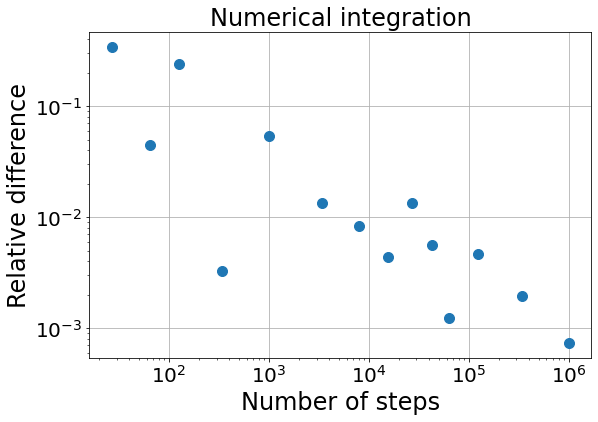

In [5]:
# Create result graph

n3_tab = n_tab**3

dv_tab = np.abs(v_tab/Vexp - 1.)

plt.figure(figsize=(9, 6))

plt.loglog(n3_tab,dv_tab,'o',markersize=10)

plt.title("Numerical integration",size=24)
plt.xlabel('Number of steps',size=24)
plt.ylabel('Relative difference',size=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-0.5,Nmax+0.5])
#plt.ylim([0.,1.1*np.max(prob_data)])      
plt.grid(which='major', axis='both')

fname = '05_numerical_integration.png'
plt.savefig(fname)

plt.show()